**Imports**

In [1]:
import copy

import matplotlib.image as mpimg #For importing images
import matplotlib.pyplot as plt #For saving images

import pyplotterlib.standard.plotters as ppl


**Process the data**

In [2]:
_imgPathColor, _imgPathGrayscale = "flowers-compressed.jpg", "flowers-grayscaled.jpg"
FULL_COLOR_IMAGE = mpimg.imread( _imgPathColor ) 
GRAYSCALE_IMAGE = mpimg.imread( _imgPathGrayscale )[:,:,0]
ASPECT_RATIO = FULL_COLOR_IMAGE.shape[1] / FULL_COLOR_IMAGE.shape[0]

print("Dimensions for full image = {}".format(FULL_COLOR_IMAGE.shape))
print("Dimensions for grayscale image = {}".format(GRAYSCALE_IMAGE.shape))
print("The aspect ratio (Width:Height) = {}".format( ASPECT_RATIO ))

Dimensions for full image = (1280, 1920, 3)
Dimensions for grayscale image = (1280, 1920)
The aspect ratio (Width:Height) = 1.5


**1) Create a simple plotter to show the image in full color**

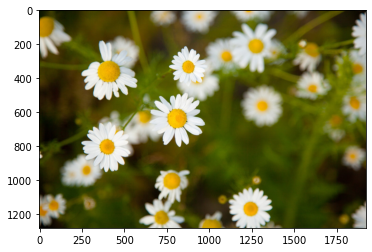

In [3]:
_currKwargs = {"plotDataImage":FULL_COLOR_IMAGE}
plotterFullColor = ppl.ImagePlotter(**_currKwargs)
_unused = plotterFullColor.createPlot()

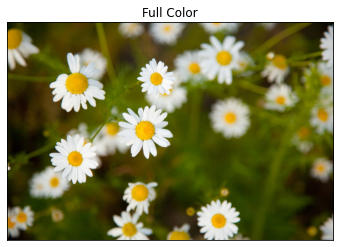

In [4]:
currKwargs = {"showTicksAndLabelsOnSides.bottom":False,
               "showTicksAndLabelsOnSides.left":False,
               "titleStr":"Full Color"}
plotterFullColor = plotterFullColor.createFactory(**currKwargs)

_unused = plotterFullColor.createPlot()

**2) Make various plotters with varying mappings for the grayscale image**

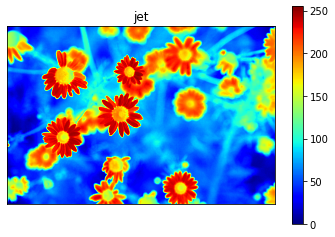

In [5]:
_useMaps = ["viridis", "Greys", "BuPu", "binary", "spring", "Spectral", "coolwarm", "twilight", "jet"]
_usePlotters = list()
for mapStr in _useMaps:
    _currKwargs = {"colorBarShow":True, "colorMapStr":mapStr,
                   "plotDataImage":GRAYSCALE_IMAGE, "titleStr":mapStr}
    _currPlotter = plotterFullColor.createFactory(**_currKwargs)
    _usePlotters.append(_currPlotter)

unused = _usePlotters[-1].createPlot()

**3) Create a grid of plots with a sensible size for the aspect ratio**

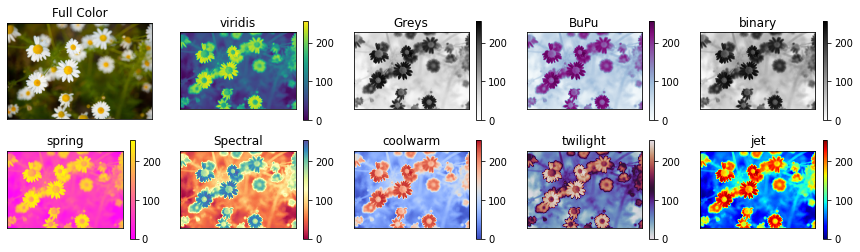

In [6]:
_heightEach = 2
_currKwargs = {"figHeightPerRow":_heightEach, "figWidthPerCol":_heightEach*ASPECT_RATIO, "nColsGrid":5}
multiPlotter = ppl.RectMultiPlotter(**_currKwargs)
_unused = multiPlotter.createPlot(plotters=[plotterFullColor] + _usePlotters)
plt.savefig("imagePlotter_imgA")

**4) Create a grid with an impractical aspect ratio - using default plotters**

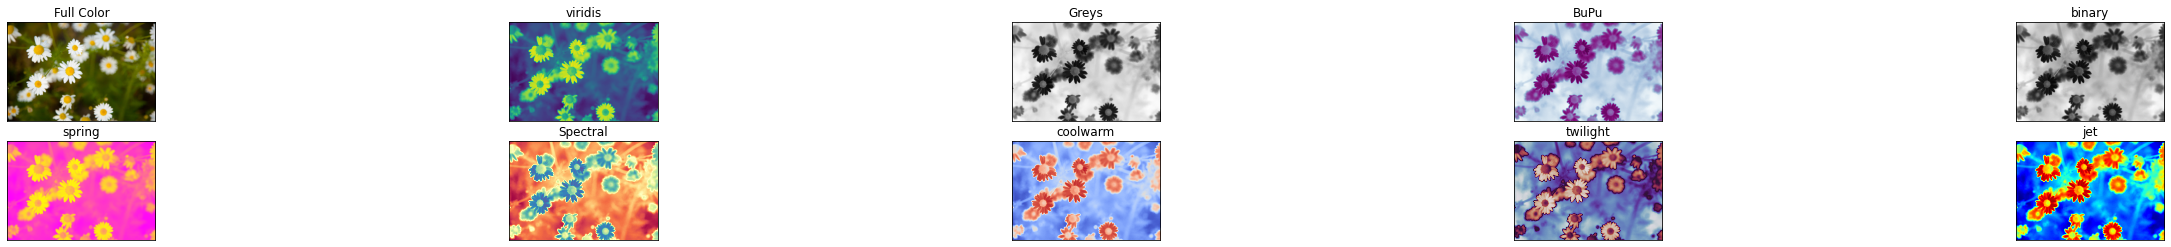

In [7]:
#We remove the colorbar to make it easier to demonstrate behavior
_fixedPlotters = copy.deepcopy([plotterFullColor] + _usePlotters)
for _currPlotter in _fixedPlotters:
    _currPlotter.opts.colorBarShow.value = False

multiPlotter_wrongAspect = multiPlotter.createFactory(figWidthPerCol=_heightEach*ASPECT_RATIO*3)
_unused = multiPlotter_wrongAspect.createPlot(plotters=_fixedPlotters, spacingHoz=0.0)
plt.savefig("imagePlotter_imgB")

**5) Use an impractical aspect ratio BUT stretch the images**

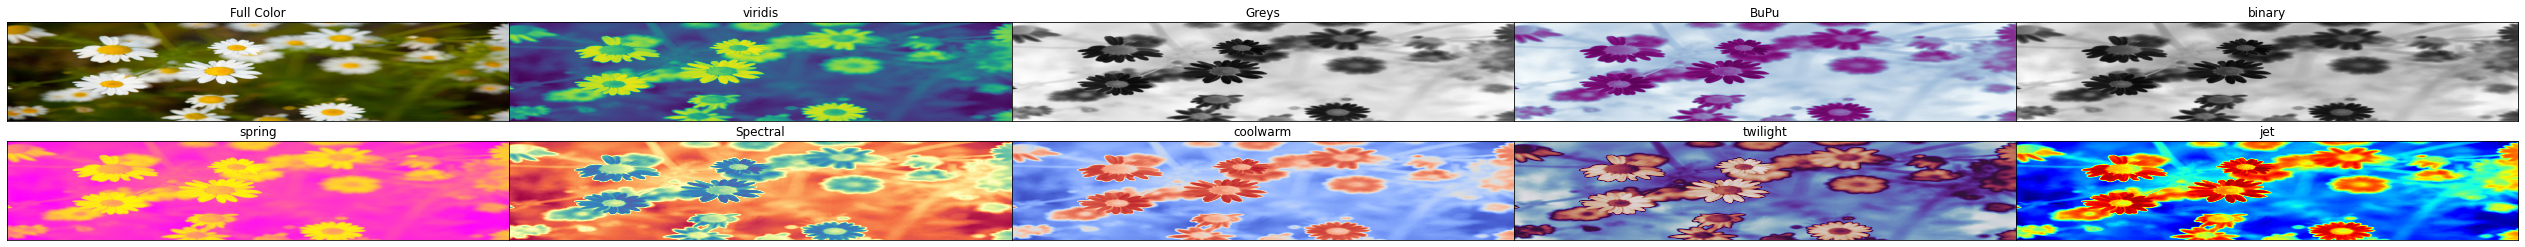

In [8]:
_stretchablePlotters = copy.deepcopy( _fixedPlotters )
for _currPlotter in _stretchablePlotters:
    _currPlotter.opts.aspectStr.value = "auto"
    
_unused = multiPlotter_wrongAspect.createPlot(plotters=_stretchablePlotters, spacingHoz=0.0)
plt.savefig("imagePlotter_imgC")